In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


# feature selection imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

# import scaling methods
from sklearn.preprocessing import RobustScaler, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

# import modeling methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from scipy import stats

# import to remove warnings
import warnings
warnings.filterwarnings("ignore")

import acquire as a

### Acquire


Acquire
Acquire the dataset from kaggle.com where each reservation represents rainfall in a day in Australia 

link to dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv

In [2]:
## acquire our data from our local csv

df = pd.read_csv('weatherAUS.csv', index_col=0) ## reading our csv into a pandas dataframe

df.head() ## previewing our data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
## looking at our data shape 
df.shape

(145460, 22)

Looks like we have a good amount of observations let's look at some numerical statistics



In [4]:
## making a numerical statistics dataframe so we add a range by subtracting the min 
## from the max

stats = df.describe().T

stats['range'] = stats['max'] - stats['min'] 

stats ## displaying our numerical statistics

,count,mean,std,min,25%,50%,75%,max,range
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9,42.4
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1,52.9
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0,129.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0,100.0


In [5]:
## looking at our columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 

In [6]:
a.summarize_df(df) ## using our custom script function to look at data types and nulls

Info on Columns and Datatypes:

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   fl

Distribution of Location



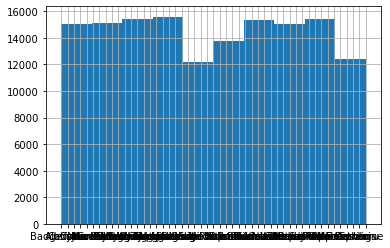

--------------------
Distribution of MinTemp



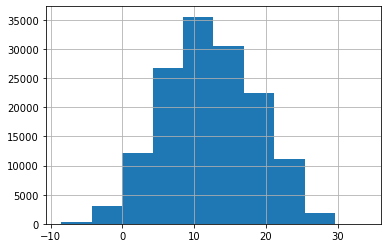

--------------------
Distribution of MaxTemp



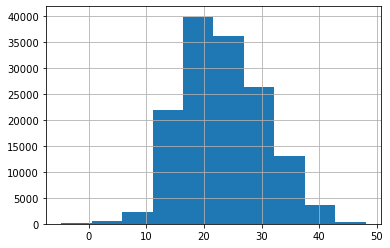

--------------------
Distribution of Rainfall



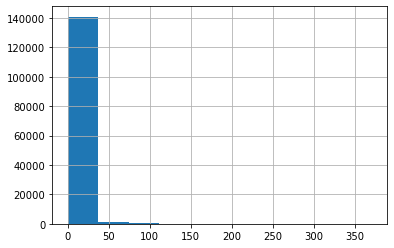

--------------------
Distribution of Sunshine



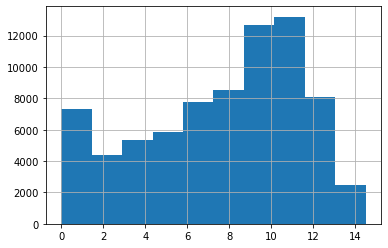

--------------------
Distribution of RainToday



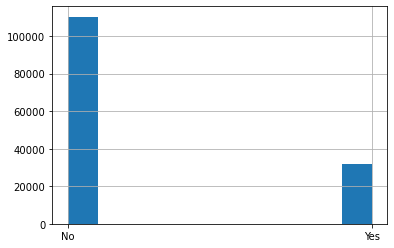

--------------------
Distribution of RainTomorrow



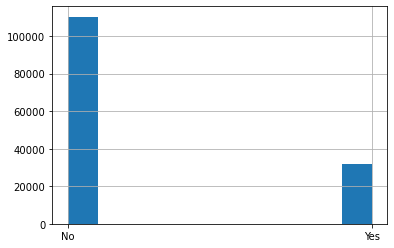

--------------------


In [7]:
## using our custom script funciton to look at distributions
a.univariate_distributions(df)

#### Acquire Takeaways

 - 

### Prepare

In [8]:
## we already checked for null values by doing the df.info() and we saw there
## were none so will now check for duplicate observations

df.duplicated().sum()

215

In [9]:
df = df.drop_duplicates() ## dropping duplicates

In [10]:
df.duplicated().sum() ## <-- quality assurance check

0

In [11]:
df.isnull().sum()

Location             0
MinTemp           1270
MaxTemp           1052
Rainfall          3089
Evaporation      62576
Sunshine         69621
WindGustDir      10111
WindGustSpeed    10048
WindDir9am       10351
WindDir3pm        4013
WindSpeed9am      1552
WindSpeed3pm      2847
Humidity9am       2439
Humidity3pm       4292
Pressure9am      14850
Pressure3pm      14813
Cloud9am         55673
Cloud3pm         59143
Temp9am           1552
Temp3pm           3394
RainToday         3089
RainTomorrow      3097
dtype: int64

In [12]:
## now we need to determine what to do with our null values

## let us start by looking at our data shape again

df.shape

(145245, 22)

Since some of the columns have about 50 percent null values we are going to remove those columns before removing null values that way it doesn't remove more than half of our observations.

In [13]:
df = df.drop(columns = ['Cloud3pm', 'Cloud9am', 'Sunshine', 'Evaporation'])

In [14]:
df.isnull().sum() ## checking nulls again2

Location             0
MinTemp           1270
MaxTemp           1052
Rainfall          3089
WindGustDir      10111
WindGustSpeed    10048
WindDir9am       10351
WindDir3pm        4013
WindSpeed9am      1552
WindSpeed3pm      2847
Humidity9am       2439
Humidity3pm       4292
Pressure9am      14850
Pressure3pm      14813
Temp9am           1552
Temp3pm           3394
RainToday         3089
RainTomorrow      3097
dtype: int64

In [15]:
df = df.dropna() ## dropping the other null because they are now 10 percent less than the amount of observations 

In [16]:
df.isnull().sum() ## quality assurance check

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [17]:
df.head() ##previewing dataframe to figure which columns are strings and need to be stripped

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [18]:
## stripping trailing and leading whitespace from string valued columns just in case

df.model = df.Location.str.strip()
df.fuelType = df.WindGustDir.str.strip()
df.transmission = df.WindDir9am.str.strip()
df.transmission = df.WindDir3pm.str.strip()
df.transmission = df.RainToday.str.strip()
df.transmission = df.RainTomorrow.str.strip()

In [19]:
df = df.reset_index() ## we also are going to reset the index so that the model information
## is a useable column

In [20]:
df.head() ## previewing the dataframe after prepare changes

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [21]:
## hot encoding the boolean columns so they work better for exploration

df['raintom'] = np.where(df.RainTomorrow == 'Yes', 1, 0)
df['raintod'] = np.where(df.RainToday == 'Yes', 1, 0)

In [22]:
## turn the transaction time to datetime format
df.Date = pd.to_datetime(df.Date) 

In [23]:
df['month'] = df['Date'].dt.month ## getting month column
df['weekday'] = df['Date'].dt.weekday ## getting weekday column

<AxesSubplot:xlabel='Pressure9am'>

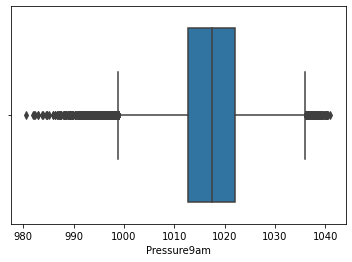

In [24]:
## Visualizing pressure to help create low pressure and high pressure categorical columns

sns.boxplot(data = df, x = 'Pressure9am')

In [25]:
## creating low pressure categorical columns because storms are most commonly formed from 
## low pressure areas which translates into the most common time for rainfall

df['low_pressure9am'] = np.where(df['Pressure9am'] < 1015, 1, 0)
df['high_pressure9am'] = np.where(df['Pressure9am'] >= 1015, 1, 0)

<AxesSubplot:xlabel='Pressure3pm'>

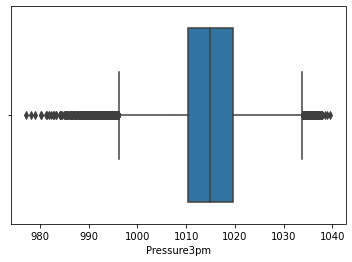

In [26]:
## Visualizing pressure to help create low pressure and high pressure categorical columns

sns.boxplot(data = df, x = 'Pressure3pm')

In [27]:
## creating low pressure categorical columns because storms are most commonly formed from 
## low pressure areas which translates into the most common time for rainfall

df['low_pressure3pm'] = np.where(df['Pressure3pm'] < 1015, 1, 0)
df['high_pressure3pm'] = np.where(df['Pressure3pm'] >= 1015, 1, 0)

<AxesSubplot:xlabel='Temp9am'>

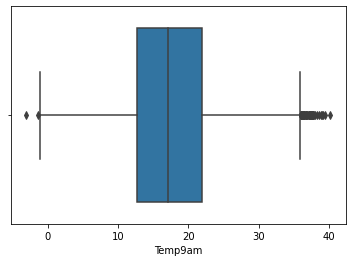

In [28]:
## Visualizing temperature to make high temp and low temp categorical columns

sns.boxplot(data = df, x = 'Temp9am')

In [29]:
## creating high temperature and low temperature categorical columns for 3pm

df['high_temp9am'] = np.where(df['Temp9am'] > 15, 1, 0)
df['low_temp9am'] = np.where(df['Temp9am'] <= 15, 1, 0)

<AxesSubplot:xlabel='Temp3pm'>

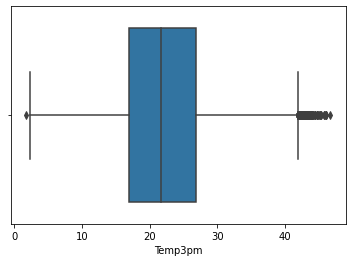

In [30]:
## Visualizing temperature to make high temp and low temp categorical columns

sns.boxplot(data = df, x = 'Temp3pm')

In [31]:
## creating high temperature and low temperature categorical columns for 3pm

df['high_temp3pm'] = np.where(df['Temp3pm'] > 23, 1, 0)
df['low_temp3pm'] = np.where(df['Temp3pm'] <= 23, 1, 0)

### Prepare: Splitting Data

In [32]:
train_validate, test = train_test_split(df, test_size=.2, 
                                    random_state=123,
                                    stratify = df.RainTomorrow)
train, validate = train_test_split(train_validate, test_size=.3, 
                               random_state=123,
                               stratify= train_validate.RainTomorrow)

print('Making Sure Our Shapes Look Good')
print(f'Train: {train.shape}, Validate: {validate.shape}, Test: {test.shape}')
print('----------------------------\n')

print('Making Sure We Have Positive Cases In Each Split\n')

print('Train Target Value Counts:')
print(train.RainTomorrow.value_counts())
print('----------------------------\n')

print('Validate Target Value Counts:')
print(validate.RainTomorrow.value_counts())
print('----------------------------\n')

print('Test Target Value Counts:')
print(test.RainTomorrow.value_counts())
print('----------------------------\n')

Making Sure Our Shapes Look Good
Train: (63238, 31), Validate: (27102, 31), Test: (22585, 31)
----------------------------

Making Sure We Have Positive Cases In Each Split

Train Target Value Counts:
No     49227
Yes    14011
Name: RainTomorrow, dtype: int64
----------------------------

Validate Target Value Counts:
No     21098
Yes     6004
Name: RainTomorrow, dtype: int64
----------------------------

Test Target Value Counts:
No     17581
Yes     5004
Name: RainTomorrow, dtype: int64
----------------------------



In [33]:
train.head() ## previewing splits

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,month,weekday,low_pressure9am,high_pressure9am,low_pressure3pm,high_pressure3pm,high_temp9am,low_temp9am,high_temp3pm,low_temp3pm
101564,2012-02-02,Hobart,11.2,18.4,2.6,ESE,24.0,NW,ESE,7.0,...,2,3,0,1,0,1,0,1,0,1
83320,2014-12-03,Nuriootpa,18.3,32.7,0.0,WSW,52.0,NE,W,11.0,...,12,2,1,0,1,0,1,0,1,0
73337,2010-03-04,Townsville,25.4,32.3,11.4,WNW,26.0,W,N,7.0,...,3,3,1,0,1,0,1,0,1,0
29842,2014-09-17,Williamtown,12.5,23.1,0.2,WNW,48.0,WNW,WNW,24.0,...,9,2,1,0,1,0,1,0,0,1
70991,2011-07-24,GoldCoast,9.2,20.4,0.0,S,30.0,NW,SE,6.0,...,7,6,0,1,0,1,1,0,0,1


In [34]:
validate.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,month,weekday,low_pressure9am,high_pressure9am,low_pressure3pm,high_pressure3pm,high_temp9am,low_temp9am,high_temp3pm,low_temp3pm
106008,2012-03-16,AliceSprings,22.3,28.8,0.0,SE,54.0,SSE,SSE,24.0,...,3,4,1,0,1,0,1,0,1,0
94327,2016-03-20,PerthAirport,17.9,32.3,2.2,E,28.0,ENE,SW,17.0,...,3,6,1,0,1,0,1,0,1,0
18310,2017-04-10,NorfolkIsland,21.7,25.7,0.0,NE,46.0,ENE,NE,22.0,...,4,0,0,1,1,0,1,0,1,0
37911,2015-08-24,Tuggeranong,8.9,11.1,0.0,SSE,31.0,S,SSW,11.0,...,8,0,0,1,0,1,0,1,0,1
2290,2016-12-14,Albury,20.4,26.9,0.4,W,35.0,ENE,W,6.0,...,12,2,1,0,1,0,1,0,1,0


In [35]:
test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,month,weekday,low_pressure9am,high_pressure9am,low_pressure3pm,high_pressure3pm,high_temp9am,low_temp9am,high_temp3pm,low_temp3pm
57807,2013-10-01,Portland,8.2,13.8,7.8,WSW,65.0,WSW,W,31.0,...,10,1,1,0,1,0,0,1,0,1
102084,2013-09-20,Hobart,10.9,17.8,0.4,S,50.0,NW,SW,17.0,...,9,4,1,0,1,0,0,1,0,1
103450,2009-01-10,Launceston,11.9,23.8,0.0,N,39.0,NW,N,7.0,...,1,5,0,1,1,0,1,0,0,1
85165,2011-12-04,Woomera,15.1,32.2,0.0,SSE,59.0,SE,SSW,30.0,...,12,6,0,1,1,0,1,0,1,0
61125,2015-03-03,Watsonia,13.9,24.0,0.0,SSW,30.0,SSE,SSW,6.0,...,3,1,0,1,0,1,1,0,1,0


### Explore

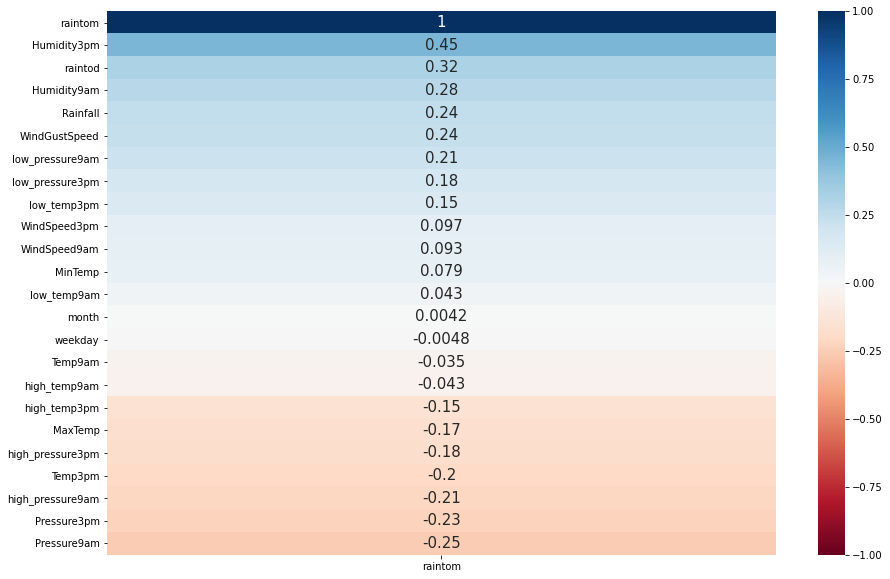

In [36]:
## making a heap map to look at correlations with is_fraud for the train data set
## helping me choose which features to use in my model

plt.figure(figsize = (15,10))  
sns.heatmap(train.corr()[['raintom']].sort_values(by='raintom', ascending = False), 
            cmap = 'RdBu', vmax = 1, vmin = -1, center = 0, annot = True, annot_kws={"size": 15} )
plt.show()

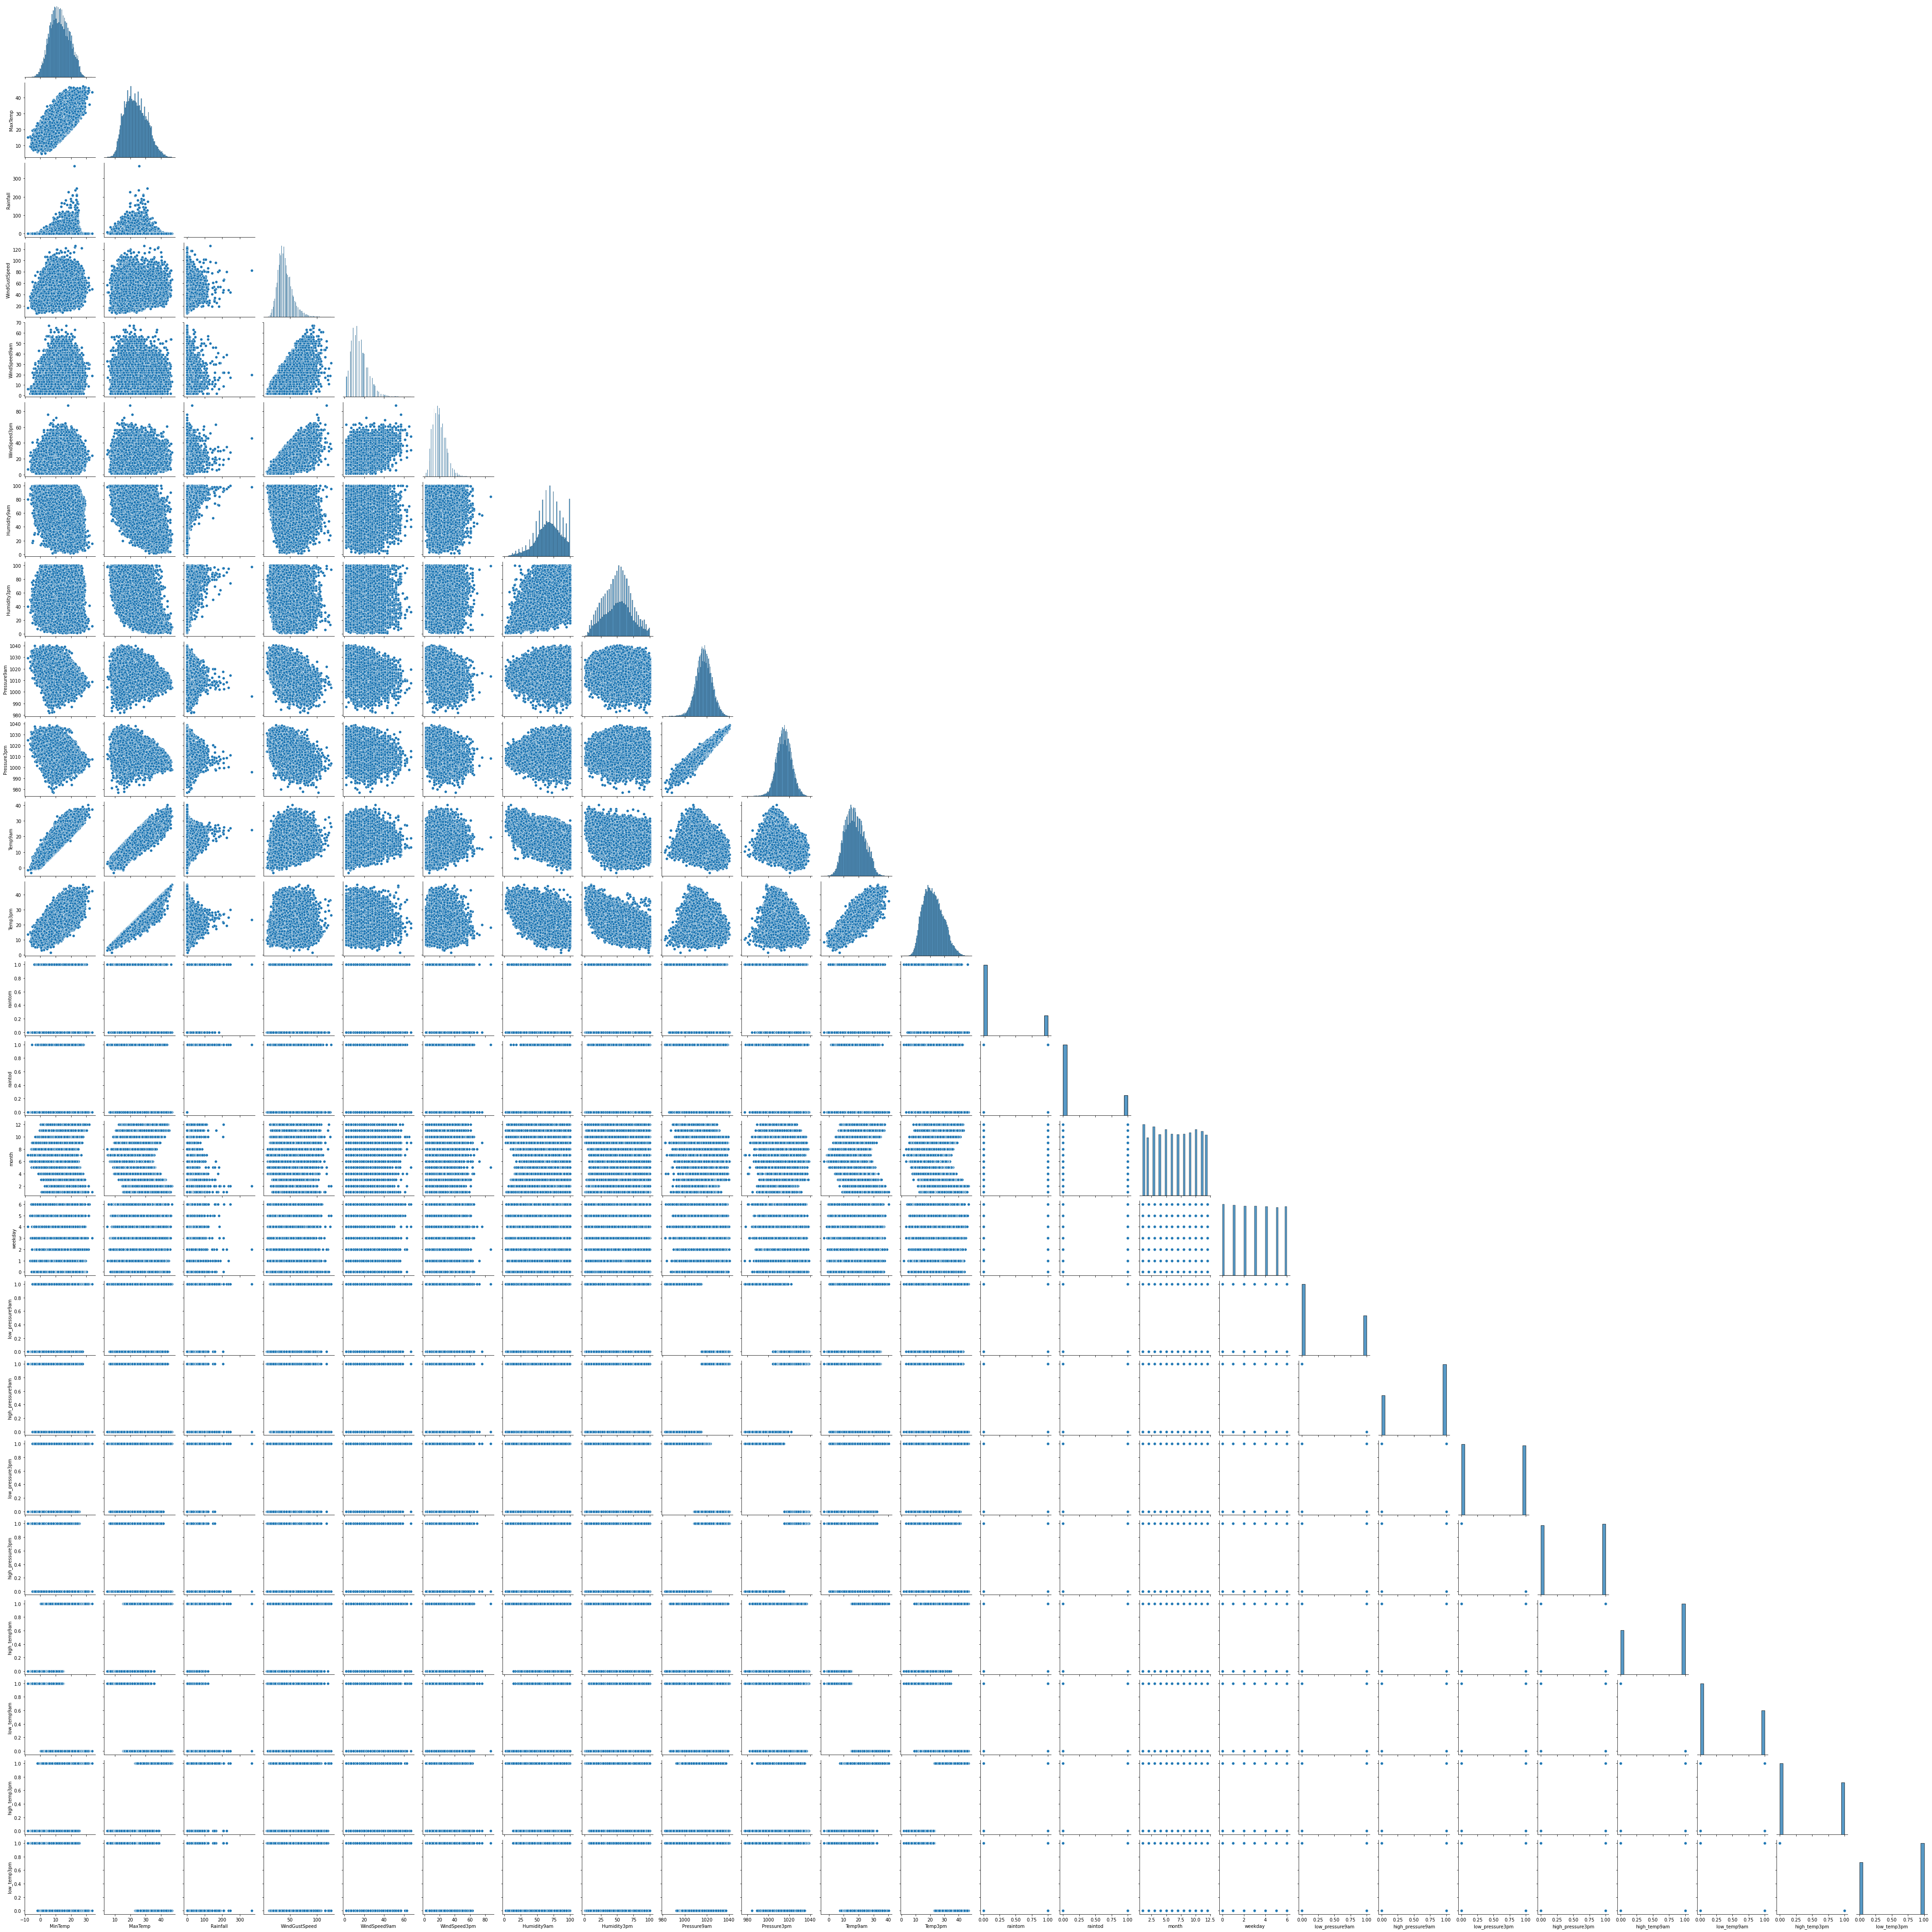

In [37]:
sns.pairplot(data = train, corner = True) ## looking at our variable relationships
plt.show()

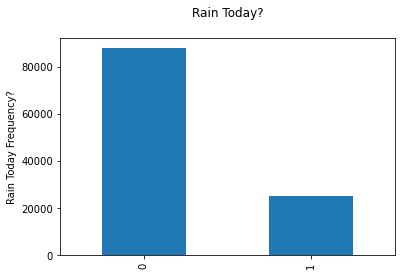

In [38]:
df['raintom'].value_counts().plot.bar()
plt.ylabel('Rain Today Frequency?')
plt.title('Rain Today?\n')
plt.show()

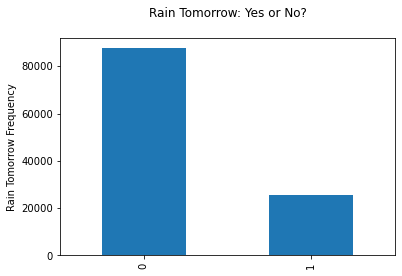

In [39]:
df['raintod'].value_counts().plot.bar()
plt.ylabel('Rain Tomorrow Frequency')
plt.title('Rain Tomorrow: Yes or No?\n')
plt.show()

<Figure size 1440x1440 with 0 Axes>

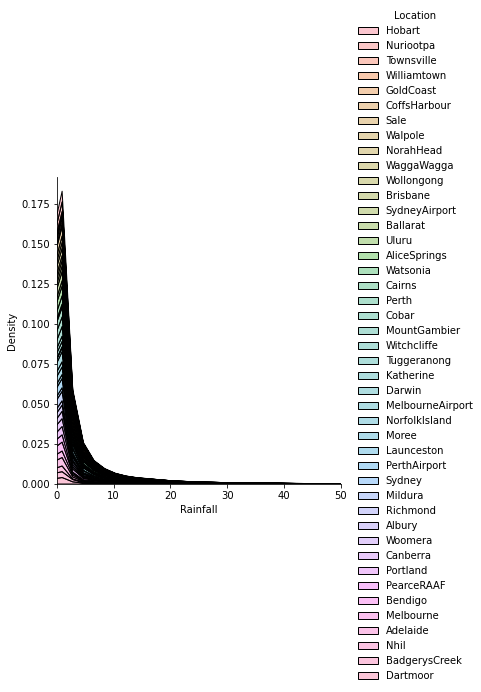

In [40]:
# histogram with hue and stacking
plt.figure(figsize = (20,20))
sns.displot(data = train, x = 'Rainfall', hue = 'Location', multiple = 'stack', 
            alpha = 0.4, kind = 'kde')
plt.xlim(0,50)
plt.show()

<Figure size 1440x1440 with 0 Axes>

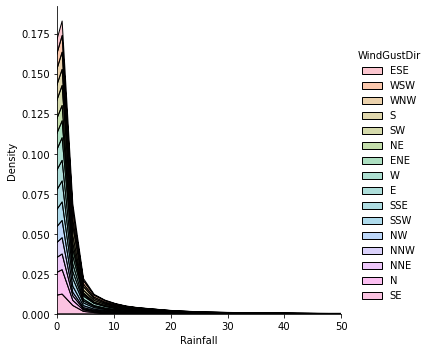

In [41]:
# histogram with hue and stacking
plt.figure(figsize = (20,20))
sns.displot(data = train, x = 'Rainfall', hue = 'WindGustDir', multiple = 'stack', 
            alpha = 0.4, kind = 'kde')
plt.xlim(0,50)
plt.show()

<Figure size 1440x1440 with 0 Axes>

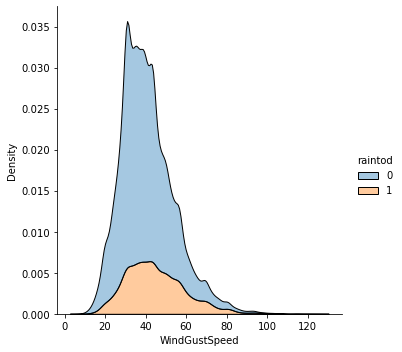

In [42]:
# histogram with hue and stacking
plt.figure(figsize = (20,20))
sns.displot(data = train, x = 'WindGustSpeed', hue = 'raintod', multiple = 'stack', 
            alpha = 0.4, kind = 'kde')
plt.show()

<Figure size 1440x1440 with 0 Axes>

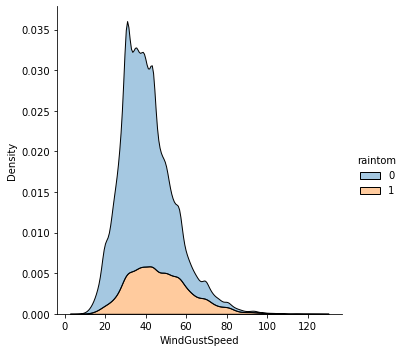

In [43]:
# histogram with hue and stacking
plt.figure(figsize = (20,20))
sns.displot(data = train, x = 'WindGustSpeed', hue = 'raintom', multiple = 'stack', 
            alpha = 0.4, kind = 'kde')

plt.show()

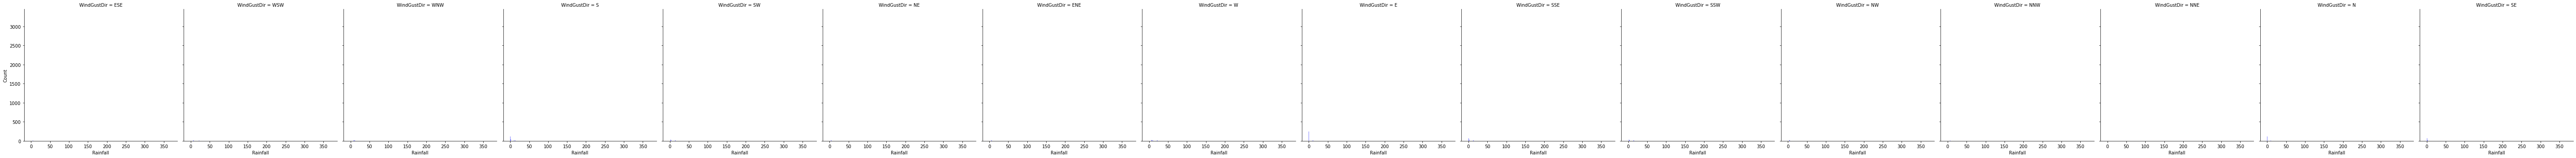

In [44]:
sns.displot(data = train, x = 'Rainfall', col = 'WindGustDir', color = 'blue', 
            alpha = 0.5) 
plt.show()

### Explore: Statistical Testing

#### Correlation Testing


Correlation Tests of

Humidity9am
Humidity3pm
Rainfall
Pressure9am
Pressure3pm
To target variable: raintom

Standard Hypothesis for correlation test of all variables

$H_0$ : There is no relationship between these variables

$H_a$ : There is evidence to suggest there is a realtionhip between these two variables

### Modeling

In [45]:

## Setting up X and y's by dropping target variable from X's and setting them to y

## also dropping unneccessary columns for predicting target variable


X_train, y_train = train.drop(columns = ['raintom','RainToday', 'RainTomorrow', 'Date']), train.raintom
X_validate, y_validate = validate.drop(columns = ['raintom','RainToday', 'RainTomorrow', 'Date']), validate.raintom
X_test, y_test = test.drop(columns = ['raintom','RainToday', 'RainTomorrow', 'Date']), test.raintom

In [46]:
y_train.head()

101564    0
83320     0
73337     0
29842     0
70991     0
Name: raintom, dtype: int64

In [47]:
## Turning all my y's into dataframe

y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [48]:
y_train.head() ## previewing our y_train dataframe

,raintom
101564,0
83320,0
73337,0
29842,0
70991,0


In [49]:
X_train.head() ## previewing

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,month,weekday,low_pressure9am,high_pressure9am,low_pressure3pm,high_pressure3pm,high_temp9am,low_temp9am,high_temp3pm,low_temp3pm
101564,Hobart,11.2,18.4,2.6,ESE,24.0,NW,ESE,7.0,13.0,...,2,3,0,1,0,1,0,1,0,1
83320,Nuriootpa,18.3,32.7,0.0,WSW,52.0,NE,W,11.0,26.0,...,12,2,1,0,1,0,1,0,1,0
73337,Townsville,25.4,32.3,11.4,WNW,26.0,W,N,7.0,13.0,...,3,3,1,0,1,0,1,0,1,0
29842,Williamtown,12.5,23.1,0.2,WNW,48.0,WNW,WNW,24.0,28.0,...,9,2,1,0,1,0,1,0,0,1
70991,GoldCoast,9.2,20.4,0.0,S,30.0,NW,SE,6.0,24.0,...,7,6,0,1,0,1,1,0,0,1


### Selecting Features

In [50]:
features = [
    'Humidity3pm',
    'raintod',
    'Rainfall',
    'Humidity9am',
    'Pressure3pm',
    'Pressure9am'
]

In [51]:
features

['Humidity3pm',
 'raintod',
 'Rainfall',
 'Humidity9am',
 'Pressure3pm',
 'Pressure9am']

In [52]:
X_train = X_train[features]
X_validate = X_validate[features]
X_test = X_test[features]

In [53]:
X_train.head() ## previewing

,Humidity3pm,raintod,Rainfall,Humidity9am,Pressure3pm,Pressure9am
101564,53.0,1,2.6,80.0,1015.0,1017.9
83320,35.0,0,0.0,54.0,1005.9,1008.4
73337,59.0,1,11.4,72.0,1004.4,1006.8
29842,23.0,0,0.2,44.0,1010.1,1013.6
70991,56.0,0,0.0,52.0,1016.5,1018.6


In [54]:
from imblearn.over_sampling import SMOTE

## using an oversampling technique to make the train x and y's have equal positive and
## negative cases

smote = SMOTE(random_state = 123)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [55]:
y_train_smote.value_counts() ## <-- quality assurance check

raintom
1          49227
0          49227
dtype: int64

### Determining Basline: Modeling

In [56]:
train.raintom.value_counts() ## doing value counts to look at what should be our baseline

0    49227
1    14011
Name: raintom, dtype: int64

In [57]:
train['baseline'] = 0 ## making our baseline column
train.baseline

101564    0
83320     0
73337     0
29842     0
70991     0
         ..
73734     0
102265    0
14192     0
46840     0
56546     0
Name: baseline, Length: 63238, dtype: int64

In [58]:
clas_rep =pd.DataFrame(classification_report(train.raintom, train.baseline, 
                                             output_dict=True)).T
clas_rep

,precision,recall,f1-score,support
0,0.778440,1.00000,0.875419,49227.00000
1,0.000000,0.00000,0.000000,14011.00000
accuracy,0.778440,0.77844,0.778440,0.77844
macro avg,0.389220,0.50000,0.437710,63238.00000
weighted avg,0.605969,0.77844,0.681461,63238.00000


In [59]:
base_recall = 0
print(f'The baseline recall is: {base_recall}')

##represents days it did not rain tomorrow

The baseline recall is: 0


In [60]:
# Function for model performs. move to explore.py
def evaluate(X_df, y_df, model):
    '''
    takes in the current X and y datasets and displays a model evaluation report with
    with confusion matrixes, forming predictions, and classification report
    '''

    #prediction
    pred = model.predict(X_df)

    #score = accuracy
    acc = model.score(X_df, y_df)

    #conf Matrix
    conf = confusion_matrix(y_df, pred)
    mat =  pd.DataFrame ((confusion_matrix(y_df, pred )),index = ['actual_not_fraud','actual_fraud'], columns =['pred_not_fraud','pred_fraud' ])
    rubric_df = pd.DataFrame([['True Negative', 'False positive'], ['False Negative', 'True Positive']], columns=mat.columns, index=mat.index)
    cf = rubric_df + ': ' + mat.values.astype(str)

    #assign the values
    tp = conf[1,1]
    fp =conf[0,1] 
    fn= conf[1,0]
    tn =conf[0,0]

    #calculate the rate
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    tnr = tn/(tn+fp)
    fnr = fn/(fn+tp)

    #classification report
    clas_rep =pd.DataFrame(classification_report(y_df, pred, output_dict=True)).T
    clas_rep.rename(index={'0': "not fraud", '1': "fraud"}, inplace = True)
    print(f'''
    The accuracy for our model is {acc:.4%}
    The True Positive Rate is {tpr:.3%},    The False Positive Rate is {fpr:.3%},
    The True Negative Rate is {tnr:.3%},    The False Negative Rate is {fnr:.3%}
    ________________________________________________________________________________
    ''')
    print('''
    The positive is  'fraud'
    Confusion Matrix
    ''')
    display(cf)
    print('''
    ________________________________________________________________________________
    
    Classification Report:
    ''')
    display(clas_rep)

### Train Model Tests

#### Decision Tree Classifier

In [61]:
model = DecisionTreeClassifier(random_state = 123, max_depth = 3)   #making a decision tree model
model.fit(X_train_smote, y_train_smote)              # fitting the model to train df's
 
print(f'The baseline recall is: {base_recall:.2%}') # printing out the basleline accuracy for comparison
evaluate(X_train_smote, y_train_smote, model)      # printing out model scores on train df

The baseline recall is: 0.00%

    The accuracy for our model is 74.8807%
    The True Positive Rate is 67.055%,    The False Positive Rate is 17.293%,
    The True Negative Rate is 82.707%,    The False Negative Rate is 32.945%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 40714,False positive: 8513
actual_fraud,False Negative: 16218,True Positive: 33009



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.715134,0.827066,0.767038,49227.000000
fraud,0.794976,0.670547,0.727479,49227.000000
accuracy,0.748807,0.748807,0.748807,0.748807
macro avg,0.755055,0.748807,0.747259,98454.000000
weighted avg,0.755055,0.748807,0.747259,98454.000000


#### Random Forest Model

In [62]:
forest_model = RandomForestClassifier()   # making a random forest model
forest_model.fit(X_train_smote, y_train_smote)       # fitting the model to train

print(f'The baseline recall is: {base_recall:.2%}')   # printing out the baseline for comparison
evaluate(X_train_smote, y_train_smote, forest_model)   #printing out model scores for train

The baseline recall is: 0.00%

    The accuracy for our model is 99.9970%
    The True Positive Rate is 99.998%,    The False Positive Rate is 0.004%,
    The True Negative Rate is 99.996%,    The False Negative Rate is 0.002%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 49225,False positive: 2
actual_fraud,False Negative: 1,True Positive: 49226



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.999980,0.999959,0.99997,49227.00000
fraud,0.999959,0.999980,0.99997,49227.00000
accuracy,0.999970,0.999970,0.99997,0.99997
macro avg,0.999970,0.999970,0.99997,98454.00000
weighted avg,0.999970,0.999970,0.99997,98454.00000


#### K Nearest Neighbor

In [63]:
knn_model = KNeighborsClassifier(n_neighbors = 5) #making a k nearest neighbor model 
knn_model.fit(X_train_smote, y_train_smote) #fitting the model to train

print(f'The baseline recall is: {base_recall:.2%}') #printing out the baseline accuracy for comparison
evaluate(X_train_smote, y_train_smote, knn_model) #using evaluate function from evaluation file to print out scores

The baseline recall is: 0.00%

    The accuracy for our model is 89.4479%
    The True Positive Rate is 96.809%,    The False Positive Rate is 17.913%,
    The True Negative Rate is 82.087%,    The False Negative Rate is 3.191%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 40409,False positive: 8818
actual_fraud,False Negative: 1571,True Positive: 47656



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.962577,0.820871,0.886094,49227.000000
fraud,0.843857,0.968087,0.901713,49227.000000
accuracy,0.894479,0.894479,0.894479,0.894479
macro avg,0.903217,0.894479,0.893904,98454.000000
weighted avg,0.903217,0.894479,0.893904,98454.000000


#### Logistic Regression Model

In [64]:
logic_model = LogisticRegression(random_state = 123)  ##making a logistic regression model
logic_model.fit(X_train_smote, y_train_smote) ##fitting model to train

print(f'The baseline recall is: {base_recall:.2%}')
evaluate(X_train_smote, y_train_smote, logic_model)

The baseline recall is: 0.00%

    The accuracy for our model is 73.9767%
    The True Positive Rate is 73.173%,    The False Positive Rate is 25.220%,
    The True Negative Rate is 74.780%,    The False Negative Rate is 26.827%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 36812,False positive: 12415
actual_fraud,False Negative: 13206,True Positive: 36021



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.735975,0.747801,0.741841,49227.000000
fraud,0.743682,0.731733,0.737659,49227.000000
accuracy,0.739767,0.739767,0.739767,0.739767
macro avg,0.739829,0.739767,0.739750,98454.000000
weighted avg,0.739829,0.739767,0.739750,98454.000000


### Validate Tests

#### Logistic Regression Validate

In [65]:
logic_model = LogisticRegression(random_state = 123)  ##making a logistic regression model
logic_model.fit(X_validate, y_validate) ##fitting model to train

print(f'The baseline recall is: {base_recall:.2%}')
evaluate(X_validate, y_validate, logic_model)

The baseline recall is: 0.00%

    The accuracy for our model is 83.5289%
    The True Positive Rate is 42.189%,    The False Positive Rate is 4.707%,
    The True Negative Rate is 95.293%,    The False Negative Rate is 57.811%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 20105,False positive: 993
actual_fraud,False Negative: 3471,True Positive: 2533



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.852774,0.952934,0.900076,21098.000000
fraud,0.718378,0.421885,0.531584,6004.000000
accuracy,0.835289,0.835289,0.835289,0.835289
macro avg,0.785576,0.687410,0.715830,27102.000000
weighted avg,0.823001,0.835289,0.818443,27102.000000


#### KNN Validate 

In [66]:
knn_model = KNeighborsClassifier(n_neighbors = 5) #making a k nearest neighbor model 
knn_model.fit(X_validate, y_validate) #fitting the model to train

print(f'The baseline recall is: {base_recall:.2%}') #printing out the baseline accuracy for comparison
evaluate(X_validate, y_validate, knn_model) #using evaluate function from evaluation file to print out scores

The baseline recall is: 0.00%

    The accuracy for our model is 86.6652%
    The True Positive Rate is 56.529%,    The False Positive Rate is 4.759%,
    The True Negative Rate is 95.241%,    The False Negative Rate is 43.471%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 20094,False positive: 1004
actual_fraud,False Negative: 2610,True Positive: 3394



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.885042,0.952413,0.917492,21098.000000
fraud,0.771714,0.565290,0.652567,6004.000000
accuracy,0.866652,0.866652,0.866652,0.866652
macro avg,0.828378,0.758851,0.785030,27102.000000
weighted avg,0.859936,0.866652,0.858802,27102.000000


#### Decision Tree Validate

In [67]:
model = DecisionTreeClassifier(random_state = 123, max_depth = 3)   #making a decision tree model
model.fit(X_validate, y_validate)              # fitting the model to train df's
 
print(f'The baseline recall is: {base_recall:.2%}') # printing out the basleline accuracy for comparison
evaluate(X_validate, y_validate, model)      # printing out model scores on train df

The baseline recall is: 0.00%

    The accuracy for our model is 83.4551%
    The True Positive Rate is 39.507%,    The False Positive Rate is 4.038%,
    The True Negative Rate is 95.962%,    The False Negative Rate is 60.493%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 20246,False positive: 852
actual_fraud,False Negative: 3632,True Positive: 2372



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.847893,0.959617,0.900302,21098.000000
fraud,0.735732,0.395070,0.514088,6004.000000
accuracy,0.834551,0.834551,0.834551,0.834551
macro avg,0.791813,0.677343,0.707195,27102.000000
weighted avg,0.823046,0.834551,0.814743,27102.000000


### Out of Sample Test on KNN Model

In [68]:
knn_model = KNeighborsClassifier(n_neighbors = 5) #making a k nearest neighbor model 
knn_model.fit(X_test, y_test) #fitting the model to train

print(f'The baseline recall is: {base_recall:.2%}') #printing out the baseline accuracy for comparison
evaluate(X_test, y_test, knn_model) #using evaluate function from evaluation file to print out scores

The baseline recall is: 0.00%

    The accuracy for our model is 86.6106%
    The True Positive Rate is 55.216%,    The False Positive Rate is 4.454%,
    The True Negative Rate is 95.546%,    The False Negative Rate is 44.784%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 16798,False positive: 783
actual_fraud,False Negative: 2241,True Positive: 2763



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.882294,0.955463,0.917422,17581.000000
fraud,0.779188,0.552158,0.646316,5004.000000
accuracy,0.866106,0.866106,0.866106,0.866106
macro avg,0.830741,0.753811,0.781869,22585.000000
weighted avg,0.859450,0.866106,0.857355,22585.000000
